In [1]:
from datetime import date, timedelta
import requests
from requests_ntlm import HttpNtlmAuth
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline  

Download newest data from ECDC website. This uses the current date from your computer.

In [2]:
today = date.today() - timedelta(days=1)
ecdcUrl = ('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-%s.xlsx' %today)
fname = 'ecdc.xlsx'

r = requests.get(ecdcUrl, auth=HttpNtlmAuth(':',':'))

with open(fname, 'wb') as f:
    f.write(r.content)

In [3]:
totalData = pd.read_excel(fname)
totalData.tail()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
15485,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
15486,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0,Africa
15487,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
15488,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
15489,2020-03-21,21,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,Africa


Select countries to compare. Command or ctrl select different countries.

In [4]:
countries = totalData['countriesAndTerritories'].unique()
countrySelector = widgets.SelectMultiple(
    options=countries,
    description='',
    rows=15,
)
countrySelector

SelectMultiple(options=('Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua_and_Bar…

In [5]:
analyzedCountries = countrySelector.value
print(analyzedCountries)
df = totalData[totalData['countriesAndTerritories'].isin(analyzedCountries)]
dfNewCases = pd.pivot_table(df, index='dateRep', columns = 'countriesAndTerritories', values='cases').reset_index()
dfDeaths = pd.pivot_table(df, index='dateRep', columns = 'countriesAndTerritories', values='deaths').reset_index()

dfNewCases.tail()

('Brazil', 'China', 'Germany', 'Italy', 'United_States_of_America')


countriesAndTerritories,dateRep,Brazil,China,Germany,Italy,United_States_of_America
124,2020-05-03,4970,2,793,1900,29288
125,2020-05-04,4588,3,679,1389,24972
126,2020-05-05,6633,2,685,1221,22593
127,2020-05-06,6935,2,1037,1075,23841
128,2020-05-07,10503,2,1194,1444,24128


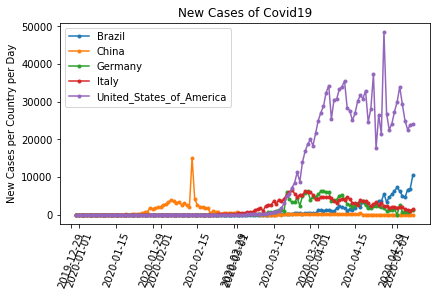

In [6]:
fig, ax = plt.subplots(constrained_layout=True)

for country in analyzedCountries:
    a = ax.plot(dfNewCases.dateRep, dfNewCases[country], '.-')
    
ax.set_ylabel('New Cases per Country per Day')
ax.set_title('New Cases of Covid19')
ax.legend()

plt.xticks(rotation=70)
plt.show()

In [7]:
sum(dfNewCases.United_States_of_America)

1228603

In [9]:
for country in analyzedCountries:
    colName = 'totalCases' + country
    dfNewCases[colName] = dfNewCases[country].cumsum() #use the cumulative sum to add all new cases up to now and calculate total cases

dfNewCases.tail()

countriesAndTerritories,dateRep,Brazil,China,Germany,Italy,United_States_of_America,totalCasesBrazil,totalCasesChina,totalCasesGermany,totalCasesItaly,totalCasesUnited_States_of_America
124,2020-05-03,4970,2,793,1900,29288,96559,83961,162496,209328,1133069
125,2020-05-04,4588,3,679,1389,24972,101147,83964,163175,210717,1158041
126,2020-05-05,6633,2,685,1221,22593,107780,83966,163860,211938,1180634
127,2020-05-06,6935,2,1037,1075,23841,114715,83968,164897,213013,1204475
128,2020-05-07,10503,2,1194,1444,24128,125218,83970,166091,214457,1228603


Brazil passed 1000 cases on 2020-03-22 00:00:00
China passed 1000 cases on 2020-01-25 00:00:00
Germany passed 1000 cases on 2020-03-10 00:00:00
Italy passed 1000 cases on 2020-03-01 00:00:00
United_States_of_America passed 1000 cases on 2020-03-11 00:00:00


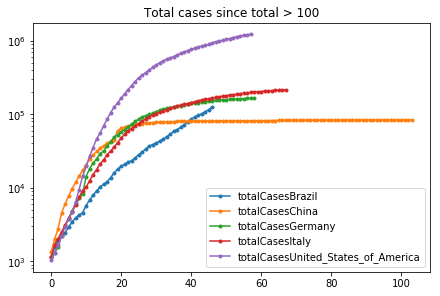

In [13]:
fig, ax = plt.subplots(constrained_layout=True)
for country in analyzedCountries:
    colName = 'totalCases' + country
    #dfOver1000AllCountries = dfNewCases.loc[dfNewCases[colName] >= 1000]
    dftemp = dfNewCases.loc[dfNewCases[colName] >= 1000].reset_index(drop=True)
    a = ax.plot(dftemp[colName], '.-')
    
    datePassed1000 = dftemp.iloc[0].dateRep
    print(country, 'passed 1000 cases on', datePassed1000)

    
plt.yscale('log')
ax.set_title('Total cases since total > 100')
ax.legend()